<a href="https://www.kaggle.com/code/suyashkapil/amazon-echo-reviews-nlp?scriptVersionId=119315596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importing Libraries** 

In [1]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB as gnb

# **Loading Dataset**

In [2]:
tweets = pd.read_csv('/kaggle/input/amazonreviewdataset/amazon_reviews.csv')
tweets

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# **Rating-wise distribution**

In [3]:
rating_group = tweets.groupby('rating').count()
rating_group

,date,variation,verified_reviews,feedback
rating,,,,
1,161,161,161,161
2,96,96,96,96
3,152,152,152,152
4,455,455,455,455
5,2286,2286,2286,2286


<BarContainer object of 5 artists>

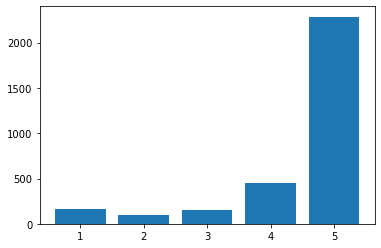

In [4]:
plt.bar(x=rating_group.index, height = rating_group['date'])

Majority of the ratings are positive (4 and 5)

# **Separating negative reviews**

In [5]:
negative = tweets[tweets['rating'] < 3]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [6]:
neg_var = negative.groupby('variation').count()['rating']
neg_var

variation
Black                           35
Black  Dot                      36
Black  Plus                     28
Black  Show                     18
Black  Spot                     32
Charcoal Fabric                 12
Configuration: Fire TV Stick    28
Heather Gray Fabric              2
Sandstone Fabric                 6
White                           17
White  Dot                      12
White  Plus                      8
White  Show                     11
White  Spot                     12
Name: rating, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8df9a59090>,
 [Text(1.0008489537919474, 0.4564004510225254, 'Black'),
  Text(0.2987463290254744, 1.0586551047880528, 'Black  Dot'),
  Text(-0.5344008644942472, 0.9614654003279586, 'Black  Plus'),
  Text(-0.9647136061955143, 0.5285145769240869, 'Black  Show'),
  Text(-1.0933496845860446, -0.12077444769319746, 'Black  Spot'),
  Text(-0.8771035151939091, -0.6638444272828449, 'Charcoal Fabric '),
  Text(-0.46250926539554654, -0.9980406702250525, 'Configuration: Fire TV Stick'),
  Text(-0.07390021143020403, -1.097514810264796, 'Heather Gray Fabric '),
  Text(0.03361089519287477, -1.0994863836011493, 'Sandstone Fabric '),
  Text(0.3373598602471051, -1.046990126359391, 'White'),
  Text(0.6798145965826526, -0.8647844322564817, 'White  Dot'),
  Text(0.8689231079244982, -0.6745165917268685, 'White  Plus'),
  Text(1.0008488723354019, -0.4564006296500416, 'White  Show'),
  Text(1.0881864409329707, -0.160780190849602, 'White  Spot')],
 [Text(0.545917611159244, 0.2

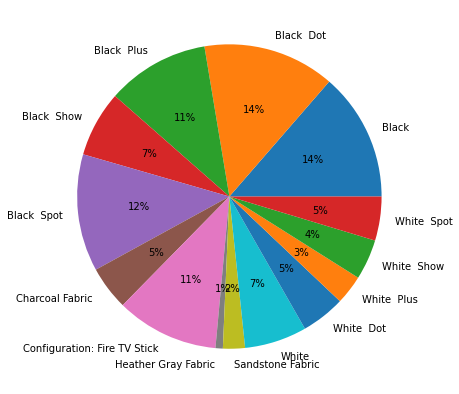

In [7]:
plt.figure(figsize = (7,7))
plt.pie(neg_var , labels = neg_var.index, autopct='%0.0f%%')

Highest Number of negative reviews are obtained by Black and Black Dot variants.

# **Neutral Reviews**

In [8]:
neutral = tweets[tweets['rating']==3]
neutral

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1
54,3,30-Jul-18,Sandstone Fabric,like google better,1
...,...,...,...,...,...
3059,3,30-Jul-18,White Dot,Works well. Just disappointed with the speaker...,1
3068,3,30-Jul-18,White Dot,I was hoping the cord was white also. Otherwis...,1
3114,3,30-Jul-18,Black Dot,,1
3122,3,30-Jul-18,Black Dot,I dislike that it confuses my requests all the...,1


# **Positive Reviews**

In [9]:
positive = tweets[tweets['rating']>3]
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [10]:
pos_var = positive.groupby('variation').count()['rating']
pos_var

variation
Black                           211
Black  Dot                      446
Black  Plus                     228
Black  Show                     233
Black  Spot                     198
Charcoal Fabric                 408
Configuration: Fire TV Stick    316
Heather Gray Fabric             145
Oak Finish                       14
Sandstone Fabric                 74
Walnut Finish                     9
White                            73
White  Dot                      160
White  Plus                      64
White  Show                      71
White  Spot                      91
Name: rating, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8df9925b90>,
 [Text(1.0679895637612662, 0.2634355551117208, 'Black'),
  Text(0.5990853295859161, 0.922549059874289, 'Black  Dot'),
  Text(-0.2148311684045988, 1.0788176718435396, 'Black  Plus'),
  Text(-0.7293985982713086, 0.8233940034028974, 'Black  Show'),
  Text(-1.032603751915695, 0.37911672546806774, 'Black  Spot'),
  Text(-1.0360365173896644, -0.3696327023344877, 'Charcoal Fabric '),
  Text(-0.42662357404205714, -1.0138995640947783, 'Configuration: Fire TV Stick'),
  Text(0.14269333596967904, -1.0907055569079331, 'Heather Gray Fabric '),
  Text(0.33799960102855653, -1.0467837740930725, 'Oak Finish '),
  Text(0.4416826315049454, -1.007430619460649, 'Sandstone Fabric '),
  Text(0.5353782817594772, -0.9609214824429049, 'Walnut Finish '),
  Text(0.6231940271831978, -0.9064376451158611, 'White'),
  Text(0.8403030899797751, -0.7098526022847576, 'White  Dot'),
  Text(0.99301109255049, -0.4732113376406807, 'White  Plus'),
  Text(1.0540759500963732, -0.3

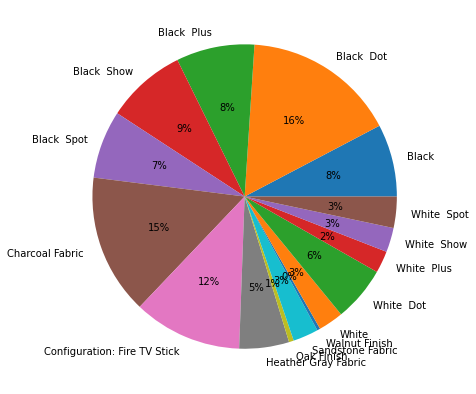

In [11]:
plt.figure(figsize = (7,7))
plt.pie(pos_var , labels = pos_var.index , autopct = '%0.0f%%')

Charcoal Fabric and Black Dot got highest number of positive reviews.

# **Reviews by variations**

Number Of tweets for each variant

In [12]:
var = tweets.groupby('variation').count()['rating']
var

variation
Black                           261
Black  Dot                      516
Black  Plus                     270
Black  Show                     265
Black  Spot                     241
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Heather Gray Fabric             157
Oak Finish                       14
Sandstone Fabric                 90
Walnut Finish                     9
White                            91
White  Dot                      184
White  Plus                      78
White  Show                      85
White  Spot                     109
Name: rating, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8df986bad0>,
 [Text(1.062943134490159, 0.2831110962859563, 'Black'),
  Text(0.5613613869275039, 0.9459774803169626, 'Black  Dot'),
  Text(-0.27036984196628555, 1.0662551986063777, 'Black  Plus'),
  Text(-0.7750976274684359, 0.7805278136574006, 'Black  Show'),
  Text(-1.0558627637030098, 0.3084701350624439, 'Black  Spot'),
  Text(-1.0194907632891776, -0.4130842330179771, 'Charcoal Fabric '),
  Text(-0.43635917829839244, -1.0097478237237019, 'Configuration: Fire TV Stick'),
  Text(0.10734122435657877, -1.0947501365853447, 'Heather Gray Fabric '),
  Text(0.291582889642248, -1.0606504695081582, 'Oak Finish '),
  Text(0.3998319059927233, -1.024760677890319, 'Sandstone Fabric '),
  Text(0.4989007745920414, -0.9803560664939353, 'Walnut Finish '),
  Text(0.5940335662474807, -0.9258099816762079, 'White'),
  Text(0.8225779198289271, -0.730318811074941, 'White  Dot'),
  Text(0.9833239386603844, -0.4930253864228787, 'White  Plus'),
  Text(1.0501552935513934, -0.3

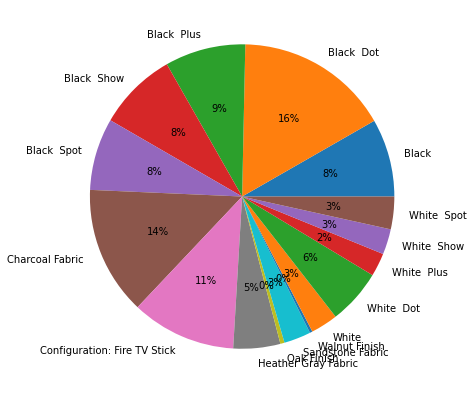

In [13]:
plt.figure(figsize=(7,7))
plt.pie(var, labels=var.index , autopct = '%0.0f%%')

Black Dot got highest number of reviews (516) with Walnut Finish getting the lowest(9).

# **All the tweets**

In [14]:
tweets.drop(columns=['date','rating','variation','feedback'])

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


# **Data Cleaning**

In [15]:
review = tweets['verified_reviews']
review

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [16]:
reviewlist = review.tolist()
reviewlist[0]

'Love my Echo!'

In [17]:
word_group = " ".join(reviewlist)
word_group[0:140]

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the '

Joined all the rows to form a paragraph

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

All the puncuation marks in string library

In [19]:
remove_punc = [ char for char in word_group if char not in string.punctuation]
para = "".join(remove_punc)
para[0:140] #first 140 characters

'Love my Echo Loved it Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the sam'

In [30]:
print('Number of words : ' ,len(para.split()))

Number of words :  79386


Punctuation marks removed

In [20]:
len(stopwords.words('english'))

179

Number of stop words in english

In [21]:
important_words = [ word for word in para.split() if word.lower() not in stopwords.words('english')]
important_words[0:10] # first 10 words of this list

['Love',
 'Echo',
 'Loved',
 'Sometimes',
 'playing',
 'game',
 'answer',
 'question',
 'correctly',
 'Alexa']

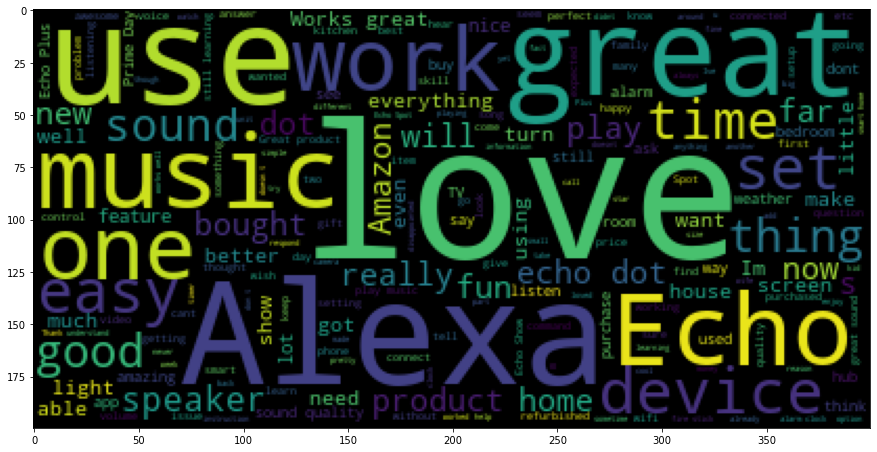

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(para))

This representation shows most used words. Larger the word on this graph, more oftenis it used.

# **Vectorization**

In [23]:
vect = CountVectorizer()
vector = vect.fit_transform(review).toarray()
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
train = pd.DataFrame(vector)
train

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Train-test splitting**

In [25]:
y = tweets['rating']
x = train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

# **Training Naive Bayes to predict ratings**

In [26]:
model = gnb()
train_model = model.fit(x,y)
y_pred = train_model.predict(x_test)
y_pred

array([2, 3, 4, ..., 3, 4, 5])

# **Testing it on random tweets**

In [27]:
def tweet_inp(rev) :
    letters = [char for char in rev if char not in string.punctuation]
    words = "".join(letters)
    imp_words = [word for word in words.split() if word.lower() not in stopwords.words('english')]
    test = CountVectorizer().fit_transform(imp_words).toarray()
    test1 = test.flatten()
    arr = np.zeros(4044)
    for i in range(len(test1)):
        arr[i] = test1[i]
    return train_model.predict(arr.reshape(1,-1))    

In [28]:
rev = input('Enter a review')
input('How many stars would you give to the product?')
print('predicted stars : ' ,tweet_inp(rev))

Enter a review Loved the product. Would definitely recommend it
How many stars would you give to the product? 5


predicted stars :  [5]
